*   **Name: Apoorv Dhaygude**
*   **NUID: 002207325**

# Data Pre-processing and Integration: An Exploratory Analysis of BigMart Sales Data

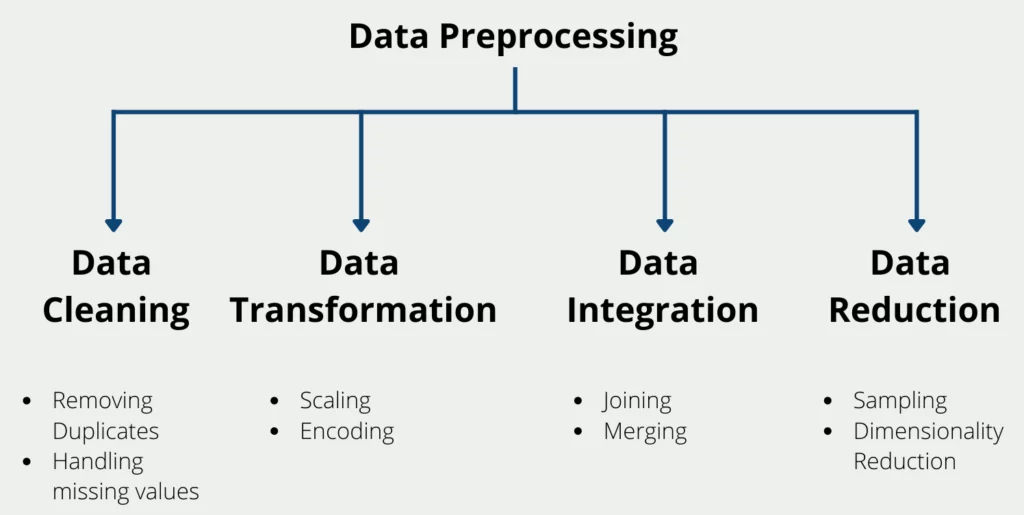




# Abstract

This notebook explores **data pre-processing and integration** techniques using the **BigMart Sales Dataset**. The primary objective is to clean, transform, and merge data to enhance its usability for analysis and predictive modeling.

The data undergoes **handling of missing values, feature transformation, encoding categorical variables, and data normalization** to ensure consistency and accuracy. Additionally, **data integration** techniques are applied to combine multiple sources, improving the dataset's comprehensiveness.

Key outcomes of this analysis include an **improved dataset structure, reduced inconsistencies, and enhanced readiness for machine learning models**. By implementing systematic pre-processing steps, this notebook lays a strong foundation for data-driven decision-making in retail sales analytics.

This study serves as a crucial step in preparing raw sales data for deeper insights, trend analysis, and forecasting, ultimately aiding businesses in strategic decision-making.

# Theory and Background

### Introduction  
Data pre-processing and integration are fundamental steps in the data analysis pipeline. Raw datasets often contain missing values, inconsistencies, and redundancies that can negatively impact analytical outcomes. Pre-processing techniques help clean and transform data into a structured format suitable for modeling and decision-making. Data integration, on the other hand, involves merging data from multiple sources to create a unified dataset, enhancing its analytical potential.

### Data Pre-processing  
Data pre-processing includes a set of techniques to enhance data quality and usability. The key steps include:  
- **Handling Missing Values:** Methods such as imputation, removal, or interpolation help address gaps in data.  
- **Data Cleaning:** Removing inconsistencies, correcting errors, and standardizing formats.  
- **Feature Engineering:** Creating new features that improve predictive power.  
- **Normalization and Scaling:** Ensuring uniformity across different variables to enhance model performance.  
- **Encoding Categorical Variables:** Transforming categorical data into a numerical format for machine learning models.  

### Data Integration  
Data integration involves combining datasets from multiple sources to provide a holistic view of the information. Techniques include:  
- **Schema Integration:** Aligning different data structures and formats.  
- **Entity Resolution:** Identifying and merging duplicate records.  
- **Data Fusion:** Combining complementary data points from multiple datasets.  

### Background and Literature Review  
Several studies highlight the importance of pre-processing and integration in data science. Research has shown that **data quality significantly impacts the performance of predictive models**. Techniques such as **Principal Component Analysis (PCA), feature selection algorithms, and automated data cleaning frameworks** have been developed to improve data handling.  

The retail industry, in particular, benefits greatly from structured data. Studies on sales data analysis have demonstrated that **pre-processing techniques such as feature scaling and outlier detection** improve demand forecasting and customer insights.  

### Conclusion  
By implementing robust data pre-processing and integration techniques, analysts can **reduce biases, enhance data quality, and improve predictive accuracy**. The methods outlined in this section form the foundation for data-driven decision-making and analytics.

# Problem Statement

### Introduction  
In today's data-driven world, raw datasets often contain **missing values, inconsistencies, duplicate records, and unstructured formats**, making them unsuitable for direct analysis. This is particularly true in large-scale retail sales data, such as the **BigMart Sales Dataset**, where discrepancies in product attributes, pricing, and store details can significantly impact business insights and forecasting accuracy.  

### Problem Definition  
The primary challenge is to **clean, transform, and integrate** sales data to ensure **consistency, accuracy, and completeness**. Specifically, the problems addressed in this study include:  
- **Handling Missing Data:** Incomplete records for product attributes (e.g., weight, visibility) can distort insights.  
- **Data Inconsistencies:** Variations in categorical labels (e.g., different representations of fat content) need standardization.  
- **Outlier Detection and Removal:** Unusual values in pricing, sales, and product visibility can skew analysis.  
- **Data Integration Issues:** Combining multiple datasets requires resolving schema differences and merging relevant attributes without redundancy.  
- **Feature Engineering Challenges:** Transforming raw data into meaningful variables for machine learning and analytical models.  

### Objective  
This study aims to develop a **systematic data pre-processing and integration pipeline** that enhances the quality of the BigMart Sales Dataset. By applying **data cleaning, transformation, encoding, and integration techniques**, the goal is to create a refined dataset ready for **predictive modeling, sales forecasting, and business intelligence applications**.  

### Significance  
Addressing these challenges ensures that the dataset is **optimized for further analysis**, leading to **more accurate sales predictions, better inventory management, and improved decision-making** in the retail industry.  


# Variable Description:

Item_Identifier: Unique product ID

Item_Weight: Weight of product

Item_Fat_Content: Whether the product is low fat or not

Item_Visibility: The % of total display area of all products in a store allocated to the particular product

Item_Type: The category to which the product belongs

Item_MRP: Maximum Retail Price (list price) of the product

Outlet_Identifier: Unique store ID

Outlet_Establishment_Year: The year in which store was established

Outlet_Size: The size of the store in terms of ground area covered

Outlet_Location_Type: The type of city in which the store is located

Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket

Item_Outlet_Sales: Sales of the product in the particular store. This is the outcome variable to be predicted.

# Importing required Libraries

In [ ]:
# Import Libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

!pip install fancyimpute
from fancyimpute import KNN
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer as MICE

import scipy.stats as stats
from scipy.stats import norm, uniform, expon
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler


  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 6.5 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29879 sha256=17e5c4f1460beae792b34ffc84f618e5cf508779eb04939cbe04d14c944688bf
  Stored in directory: /root/.cache/pip/wheels/1a/f3/a1/f7f10b5ae2c2459398762a3fcf4ac18c325311c7e3163d5a15
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11329 sha256=457b92058e59e3eb2128ae8f545bb95c2cce317c0eb49f4dc3aeaf94223d4e02
  Stored in directory: /root/.cache/pip/wheels/ea/e8/e0/79872972161e54486517ae507f94b2c7cea27fb7ef793bd415
Successfully built fancyimpute knnimpute


# Reading and Analyzing Dataset

In [ ]:
data = pd.read_csv("https://github.com/apoorv1811/Advance-Data-Science/raw/main/Bigmart.csv")

In [ ]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
data.shape

(8523, 12)

In [ ]:
# Statistical Summary of Training Dataset
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
categorical_columns = [col for col in data.columns if data[col].dtype == "object"]
print("Categorical Columns : ", categorical_columns)

numerical_columns = [col for col in data.columns if col not in categorical_columns]
print("Numerical Columns : ", numerical_columns)

Categorical Columns :  ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
Numerical Columns :  ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']


# Checking Null values

In [ ]:
total=data.isnull().sum()
percent=(data.isnull().sum()/data.isnull().count()*100)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

,Total,Percent
Item_Identifier,0,0.000000
Item_Weight,1463,17.165317
Item_Fat_Content,0,0.000000
Item_Visibility,0,0.000000
Item_Type,0,0.000000
Item_MRP,0,0.000000
Outlet_Identifier,0,0.000000
Outlet_Establishment_Year,0,0.000000
Outlet_Size,2410,28.276428
Outlet_Location_Type,0,0.000000


# Distribution of Numerical Variables

Text(0.5, 0, 'Item_Weight')

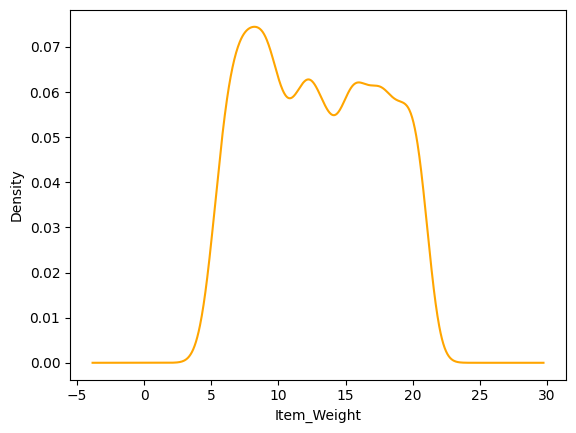

In [ ]:
# Plotting the distribution of Item_Weight (non-finite data)
data.Item_Weight.plot.density(color="Orange")
plt.xlabel("Item_Weight")

# Item Weight Distribution Analysis

## Introduction  
The above Kernel Density Estimate (KDE) plot represents the distribution of the **Item_Weight** variable from the BigMart Sales dataset. The KDE plot is a **smoothed version of a histogram**, showing how item weights are distributed across the dataset.

## Observations  
1. **Bimodal Distribution**:  
   - The plot shows **two peaks**, indicating that item weights are concentrated around two main ranges.  
   - This suggests that there might be **two distinct groups of items** with different weight categories.

2. **No Negative Values**:  
   - The distribution correctly starts from zero and extends to around 25-30, confirming that there are no erroneous negative weights.

3. **Possible Data Gaps or Clusters**:  
   - The small fluctuations in the density curve indicate variations in the frequency of item weights, which could mean that certain weight ranges are more common than others.

## Interpretation  
- The presence of **multiple peaks** may suggest different categories of products with distinct weight characteristics.  
- If missing values were imputed, this plot helps validate whether the imputed values align well with the existing distribution.  
- If necessary, further investigation into **item types** and their weight ranges could help understand this pattern better.

## Next Steps  
- **Check for missing values and imputation methods**: If missing values were filled using mean/mode, verifying their distribution is crucial.  
- **Investigate item categories**: Exploring whether certain product categories correspond to specific weight ranges can provide additional insights.  
- **Feature Engineering**: Creating a **categorical weight class feature** (e.g., light, medium, heavy) based on weight distribution could improve analysis.



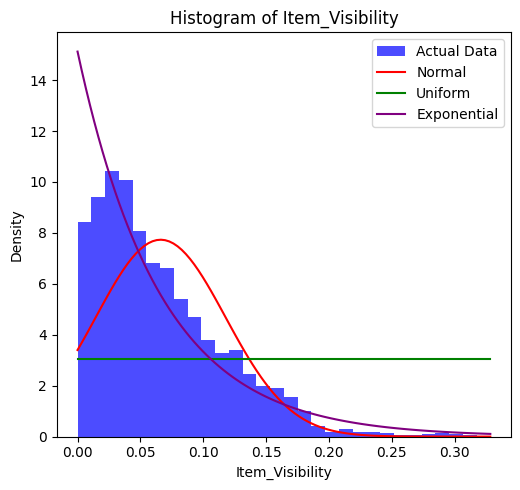

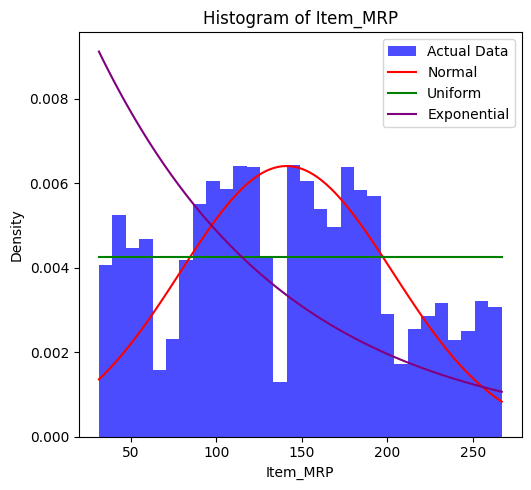

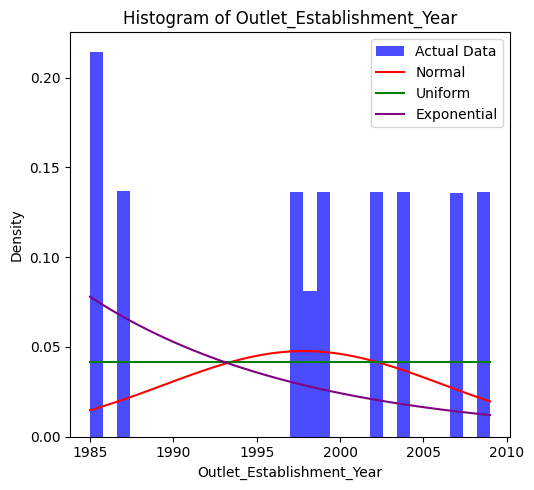

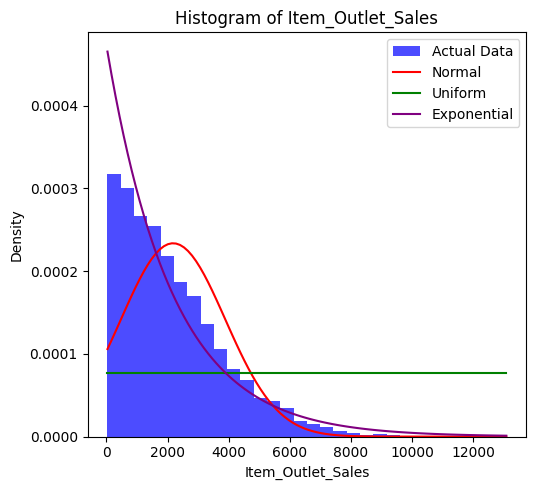

In [ ]:
def plot_distributions(data, column_name):
    # Fit different distributions
    normal_params = norm.fit(data)
    uniform_params = uniform.fit(data)
    exponential_params = expon.fit(data)

    # Plot the histograms and fitted distributions
    plt.figure(figsize=(10, 5))

    # Plot histogram of actual data
    plt.subplot(1, 2, 1)
    plt.hist(data, bins=30, density=True, alpha=0.7, color='blue', label='Actual Data')
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Density')

    # Plot the fitted distributions
    x = np.linspace(min(data), max(data), 100)
    plt.plot(x, norm.pdf(x, *normal_params), label='Normal', color='red')
    plt.plot(x, uniform.pdf(x, *uniform_params), label='Uniform', color='green')
    plt.plot(x, expon.pdf(x, *exponential_params), label='Exponential', color='purple')

    # Adjust layout
    plt.tight_layout()
    plt.legend()
    plt.show()

# Item_Visibility
item_visibility = data["Item_Visibility"].values
plot_distributions(item_visibility, "Item_Visibility")

# Item_MRP
item_mrp = data["Item_MRP"].values
plot_distributions(item_mrp, "Item_MRP")

# Outlet_Establishment_Year
item_mrp = data["Outlet_Establishment_Year"].values
plot_distributions(item_mrp, "Outlet_Establishment_Year")

# Item_Outlet_Sales
item_mrp = data["Item_Outlet_Sales"].values
plot_distributions(item_mrp, "Item_Outlet_Sales")

# Data Distribution Analysis

## 1. **Histogram of Item_Outlet_Sales**
### Observations:
- The sales distribution is **right-skewed**, meaning most sales values are concentrated on the lower end, with a few high-value outliers.
- The dataset does **not follow a normal distribution**, as the red curve (normal distribution) does not fit well.
- The **exponential distribution (purple curve)** seems to match the pattern better, indicating that sales drop off significantly after a certain value.

### Implications:
- Sales data might need **log transformation** to make it more normally distributed.
- Outlier handling might be necessary for extreme values.

---

## 2. **Histogram of Item_Visibility**
### Observations:
- The distribution is also **right-skewed**, similar to sales, with most values concentrated near zero.
- Some products have **very low visibility**, possibly due to missing values or errors in data collection.
- The **normal distribution (red)** does not fit well, while the **exponential (purple)** appears to align better.

### Implications:
- Adjusting **zero visibility values** may be required.
- Feature engineering can be applied by creating a **visibility category feature** (e.g., Low, Medium, High).

---

## 3. **Histogram of Item_MRP (Maximum Retail Price)**
### Observations:
- The distribution appears **multi-modal**, suggesting that MRP values cluster around specific price points.
- The normal distribution (red) fits better than in previous cases but still does not fully capture the peaks.
- The uniform distribution (green) is not a good fit, indicating that prices do not follow a uniform spread.

### Implications:
- Pricing tiers may exist, and clustering techniques could help categorize price segments.
- Further analysis can be conducted to check if different price ranges correspond to different item categories.

---

## 4. **Histogram of Outlet_Establishment_Year**
### Observations:
- The distribution is **not continuous**, as only specific years are present.
- Most outlets were established in **1985, 1998, 2004, and 2009**, with a few in other years.
- The normal and exponential distributions **do not fit well**, as establishment years are categorical in nature.

### Implications:
- This variable should be treated as **categorical or ordinal**, rather than continuous.
- A new feature like **"Outlet Age" (2023 - Outlet_Establishment_Year)** could be created to make it more meaningful.

---

## Conclusion:
- **Item_Outlet_Sales and Item_Visibility** exhibit **skewed distributions**, requiring potential transformations.
- **Item_MRP shows a multi-modal distribution**, suggesting distinct price categories.
- **Outlet_Establishment_Year is categorical**, meaning analysis should be conducted differently than on continuous variables.
- **Feature engineering** (e.g., log transformation, binning categories, and handling zero visibility) could improve data usability for predictive modeling.

**Conclusion**:
* Item_Weight - Normal Distribution
* Item_Visibility - Exponential Distribuition (Left Skewed)
* Item_MRP - Uniform Distribution
* Outlet_Establishment_Year - Uniform Distribution
* Item_Outlet_Sales - Exponential Distribuition (Left Skewed)

# Analyzing Outliers if any

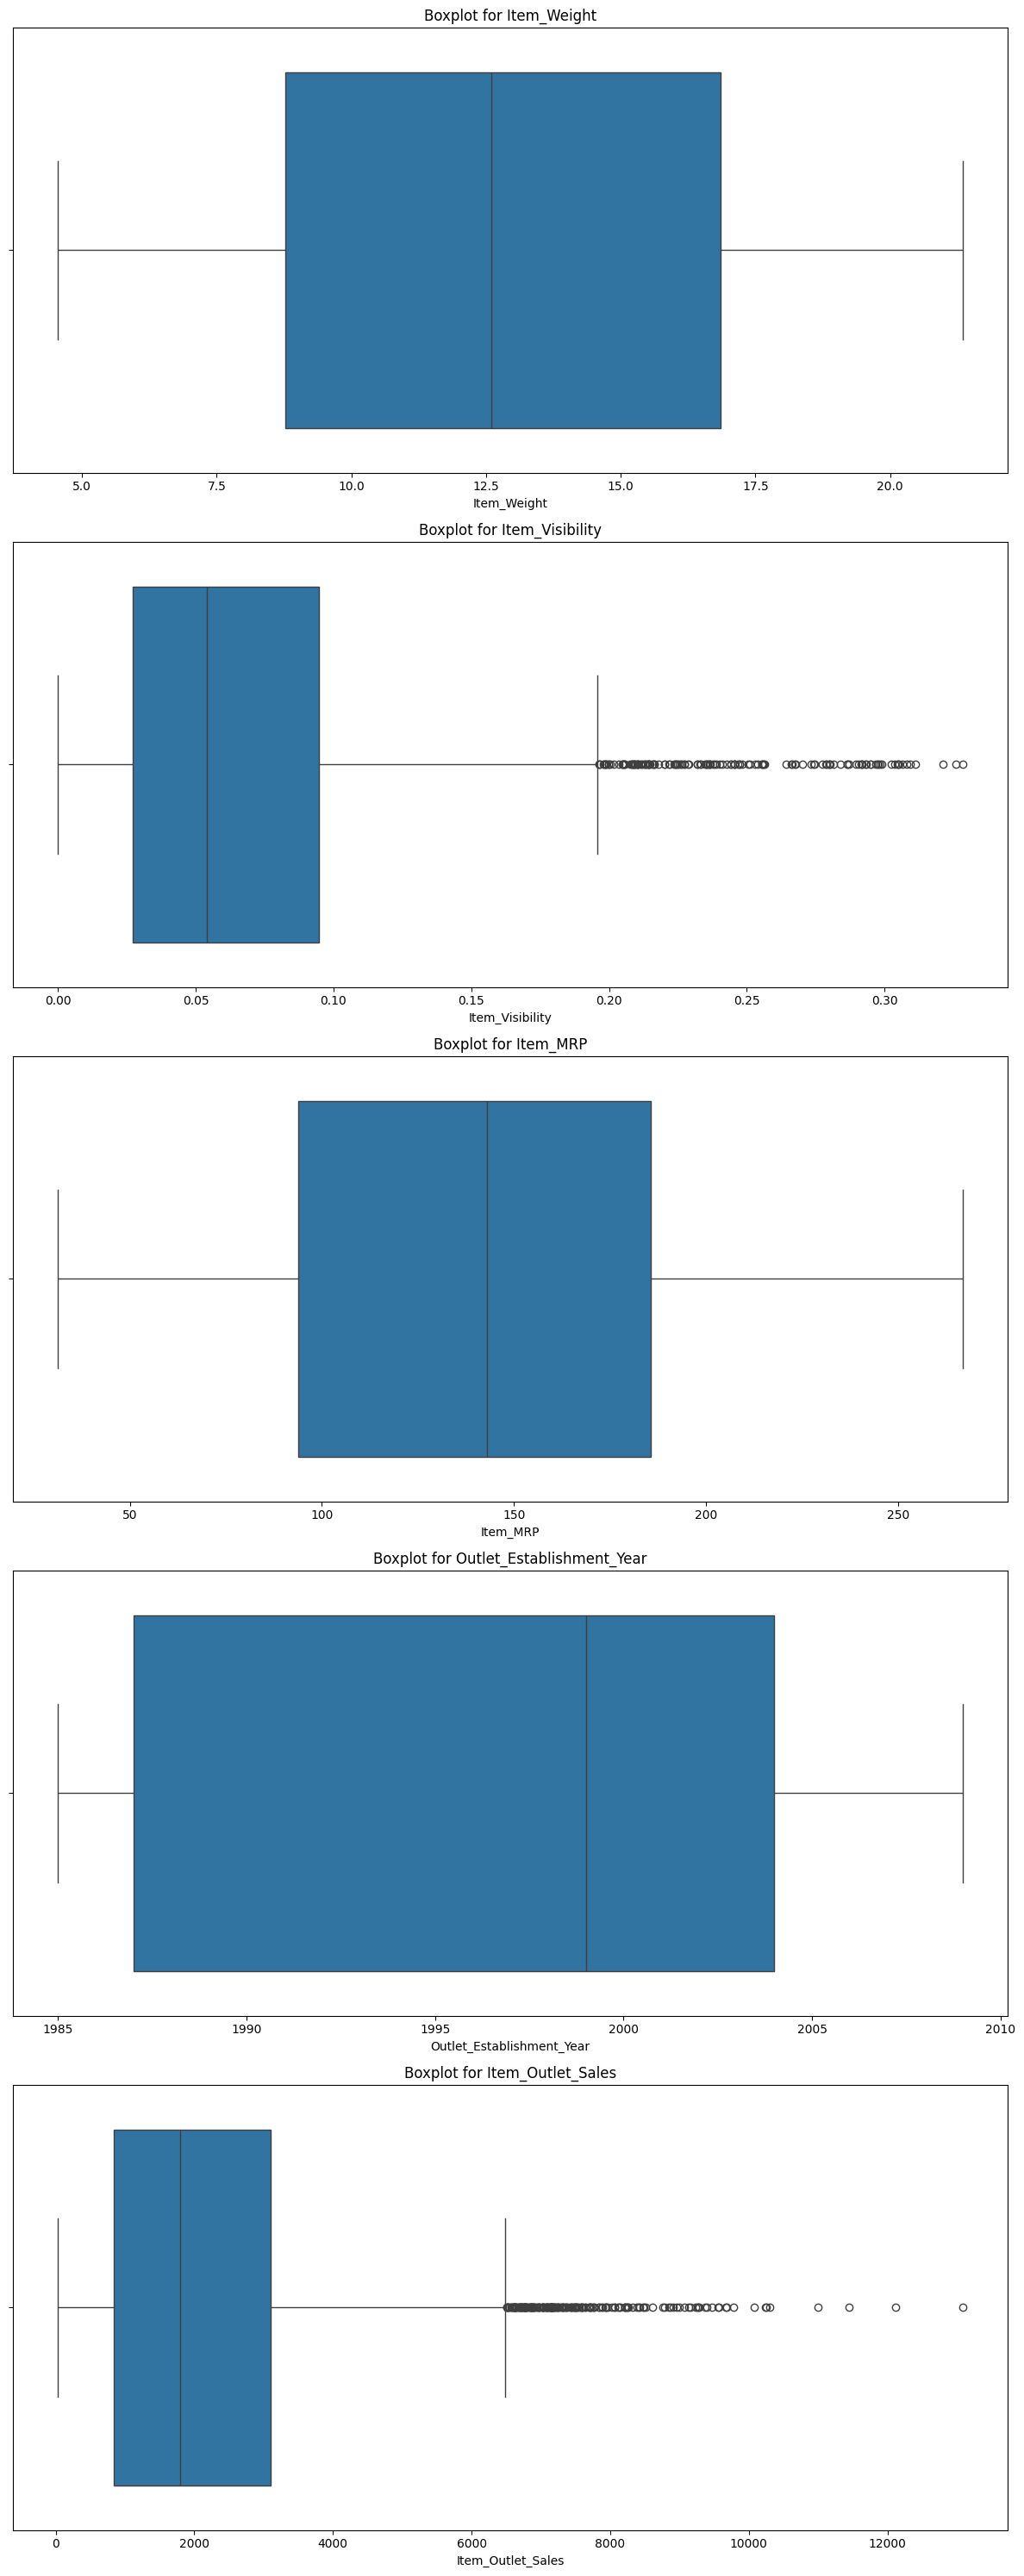

In [ ]:
def plot_boxplots(data, columns):
    plt.figure(figsize=(12, 6 * len(columns)))  # Adjust figure size dynamically

    for i, col in enumerate(columns, 1):
        plt.subplot(len(columns), 1, i)
        sns.boxplot(x=data[col])
        plt.title(f'Boxplot for {col}')

    plt.tight_layout()  # Adjust layout for better visualization
    plt.show()

# List of numerical columns to plot
num_cols = ["Item_Weight", "Item_Visibility", "Item_MRP", "Outlet_Establishment_Year", "Item_Outlet_Sales"]

# Call the function to display boxplots
plot_boxplots(data, num_cols)


# Conclusion

### 1. **Presence of Outliers in Item_Visibility**
- The **Item_Visibility** variable exhibits extreme values, with some items having **zero or near-zero visibility**.  
- This is likely due to **data entry errors or missing values incorrectly recorded as zero**.  
- Additionally, a few items have **abnormally high visibility**, which could be anomalies or rare cases of excessive shelf space allocation.  

### **Implications:**
- Items with zero visibility need **imputation or correction**, possibly by assigning them the median or mean value within their category.  
- Outliers on the higher end should be examined to determine if they are valid data points or need adjustment.  
- Feature engineering can be applied by creating **binned visibility categories** (e.g., Low, Medium, High) to better represent this feature.

---

### 2. **Presence of Outliers in Item_Outlet_Sales**
- The **Item_Outlet_Sales** distribution is highly **right-skewed**, meaning most sales are on the lower end while a few items have exceptionally high sales.  
- These extreme values might be genuine (e.g., best-selling items) or **represent unusual spikes in sales due to promotions or bulk purchases**.  

### **Implications:**
- Outlier detection techniques (such as **IQR method or Z-score analysis**) can help determine if these values should be **retained or adjusted**.  
- Sales outliers should be analyzed in relation to other factors like **Item_Type, Item_MRP, and Outlet_Type** to check for patterns.  
- If necessary, applying a **log transformation** can help normalize the sales distribution for predictive modeling.

---

### **Overall Impact and Next Steps**
- The presence of **outliers in both features suggests data inconsistencies or special cases** that require closer examination.  
- Outlier handling should be done **carefully**, ensuring that valid business trends (e.g., best-selling products) are preserved.  
- **Transformations, feature engineering, and data cleaning** steps will improve model accuracy and data reliability.  

By addressing these issues, we can enhance the dataset’s quality, leading to **better predictive modeling and data-driven decision-making** in sales analysis.


#Collinearity

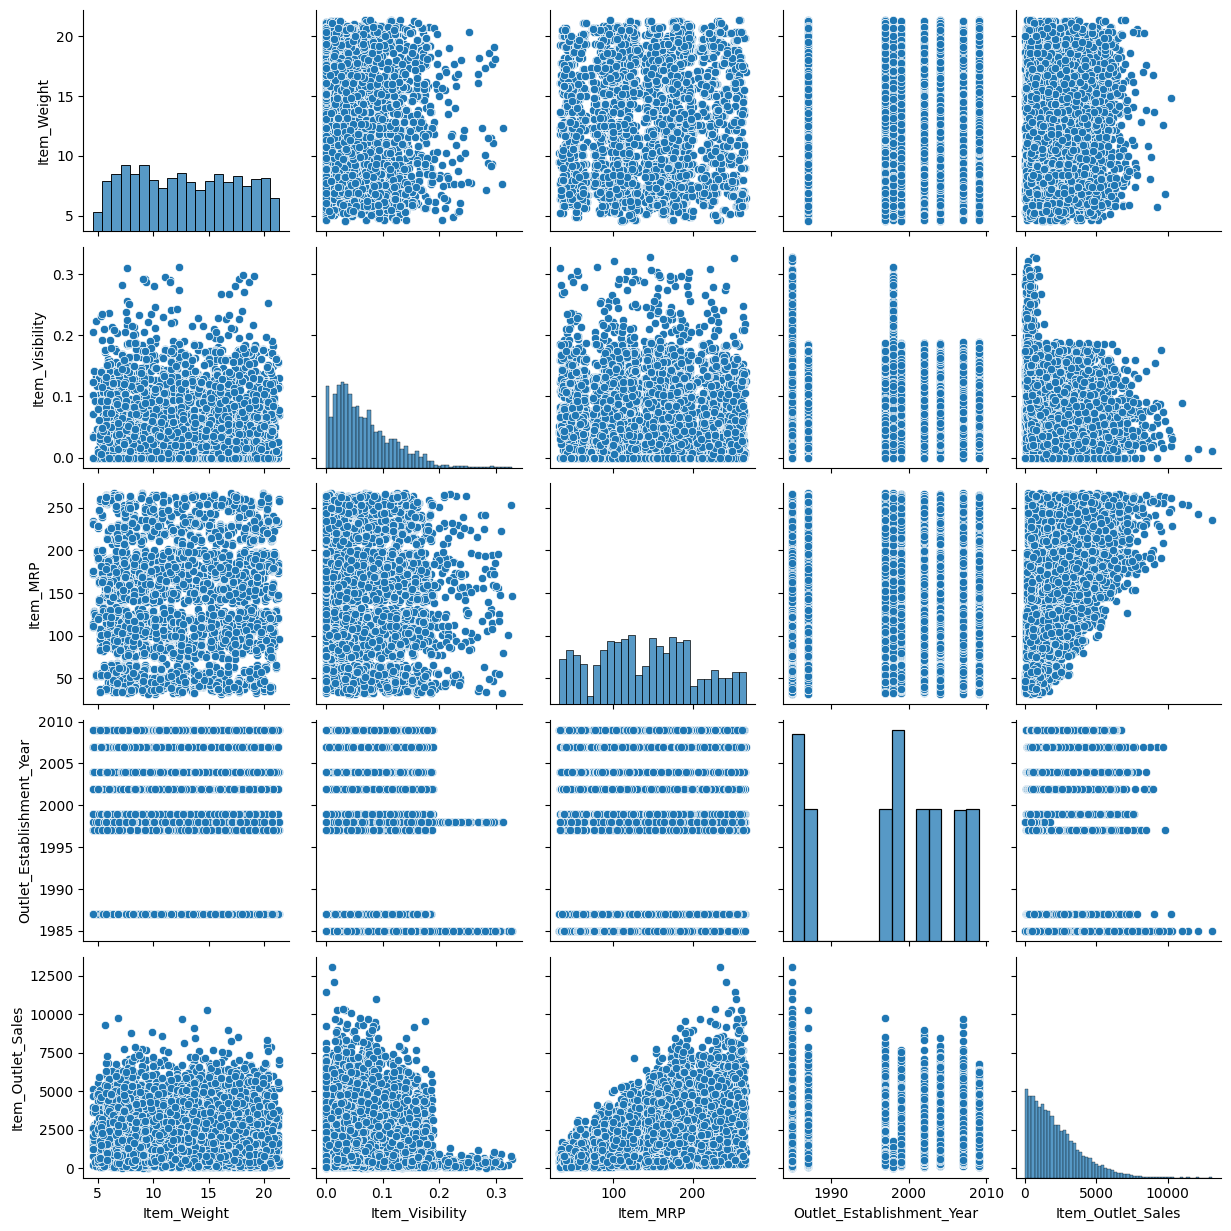

In [ ]:
sns.pairplot(data)

# Pairplot Analysis: Exploring Relationships Between Variables

## Introduction  
The above pairplot provides a **multi-variable comparison** using scatter plots and histograms. It helps visualize relationships, trends, and potential correlations between numerical features in the **BigMart Sales Dataset**.

---

## **Key Observations**  

### 1. **Item_Weight**  
- The histogram shows a **fairly uniform distribution**, meaning products cover a wide range of weights.  
- No strong correlation with other variables is observed, as scatter plots appear **randomly spread**.  
- This suggests that **Item_Weight does not significantly impact sales**.

---

### 2. **Item_Visibility**  
- The distribution is **right-skewed**, with many items having near-zero visibility.
- The scatter plot with **Item_Outlet_Sales** shows a downward trend for extremely low visibility values.
- This might indicate **missing or incorrectly recorded data** (e.g., items with 0 visibility but high sales).
- Feature transformation (e.g., **adjusting zero values**) might be needed.

---

### 3. **Item_MRP (Maximum Retail Price)**  
- The histogram indicates a **multi-modal distribution**, suggesting the presence of **price clusters**.
- A **strong positive correlation with Item_Outlet_Sales** is observed.  
- Higher-priced products generally have higher sales, but some variations exist.
- This suggests that **pricing strategy plays a key role in sales performance**.

---

### 4. **Outlet_Establishment_Year**  
- The feature is **categorical**, with specific years appearing as distinct vertical clusters.
- The lack of a clear trend in sales suggests that **outlet age alone does not determine sales performance**.
- Converting this to a **"Years_Operational"** feature might make it more useful.

---

### 5. **Item_Outlet_Sales (Target Variable)**  
- The distribution is **right-skewed**, meaning most items have low sales, with some high-performing products.
- Strong **positive correlation with Item_MRP**, confirming that **higher-priced products tend to generate more revenue**.
- Weak correlation with **Item_Weight**, meaning weight is not a key factor in sales.

---

## **Conclusions & Next Steps**  
 **Item_Visibility likely has missing or misrecorded values** – requires imputation or feature engineering.  
 **Item_MRP is a key driver of sales** – further pricing analysis can reveal more insights.  
 **Outlet_Establishment_Year should be transformed into a numerical variable ("Years_Operational")**.  
 **Item_Outlet_Sales is right-skewed** – log transformation could improve modeling performance.  

This analysis provides **critical insights for feature selection, data transformation, and model preparation** for predictive analysis.


Text(0.5, 1.0, 'Variable Correlation')

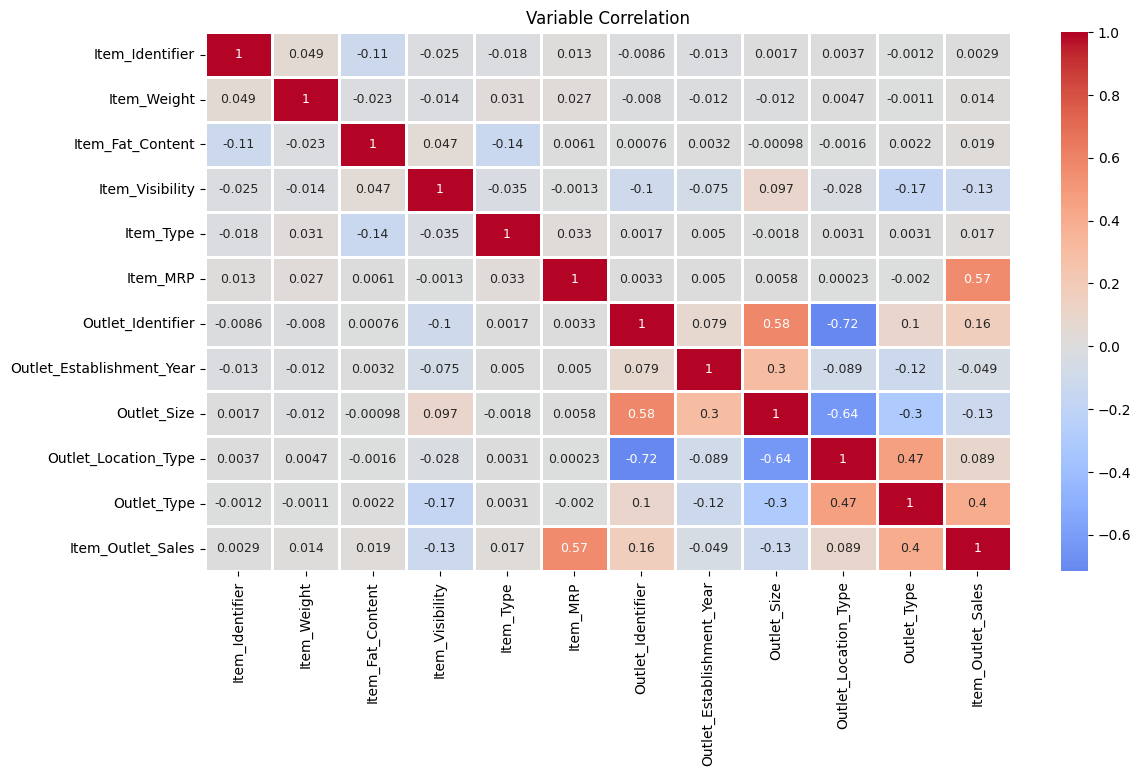

In [ ]:
from IPython.core.pylabtools import figsize
f,ax=plt.subplots(figsize=(13,7))

sns.heatmap(data.corr(),center=0, linewidths=0.9,cmap='coolwarm',annot=True, annot_kws={"size": 9})
plt.title('Variable Correlation')

# Correlation Analysis

## Introduction  
The heatmap above represents the **Pearson correlation coefficients** between numerical variables in the BigMart Sales Dataset. Correlation values range from **-1 to 1**, where:  
- **1** indicates a **strong positive correlation** (variables increase together).  
- **-1** indicates a **strong negative correlation** (one variable increases while the other decreases).  
- **0** means **no correlation** (no linear relationship between variables).  

---

## **Key Observations**  

### 1. **Item_Outlet_Sales (Target Variable)**
- **Strongest positive correlation** with **Item_MRP (0.57)**:
  - Higher-priced items tend to have higher sales.
  - Suggests that **pricing is a key driver of sales**.
- **Weak negative correlation with Item_Visibility (-0.13)**:
  - Items with very low visibility might still have high sales.
  - Could indicate missing values or display errors.
- **Low correlation with other numerical features**:
  - Suggests that factors such as **Item_Weight and Outlet_Establishment_Year** do not significantly impact sales.

---

### 2. **Item_MRP (Maximum Retail Price)**
- **No significant correlation with other variables** except **Item_Outlet_Sales (0.57)**.
- Prices are not dependent on store type, size, or visibility.

---

### 3. **Outlet_Identifier and Outlet_Size**
- **Moderate positive correlation (0.58)**:
  - Outlets with certain IDs tend to have specific sizes.
  - This might suggest that stores are categorized based on a specific size structure.

---

### 4. **Outlet_Location_Type and Outlet_Identifier (-0.72)**
- **Strong negative correlation**:
  - Certain locations are associated with specific outlet IDs.
  - May indicate that outlets in different cities follow different sizing strategies.

---

### **Key Takeaways & Next Steps**
 **Item_MRP is the most influential factor for sales** – important for predictive modeling.  
 **Item_Visibility has a weak correlation with sales**, suggesting possible data inconsistencies.  
 **Outlet_Type has a small impact on sales**, meaning additional categorical variables (like store format) might need to be explored.  
**Feature Engineering Opportunity:**  
   - **Transform Item_Visibility** (e.g., missing value treatment, feature scaling).  
   - **Create new categorical features based on outlet characteristics** (e.g., "Years in Operation" for Outlet_Establishment_Year).  

This correlation analysis provides **valuable insights for feature selection** and data preprocessing for predictive modeling.


# Understanding Categorical Data

In [ ]:
#Unique Values of Item_Fat_Content

print("Unique values :", data['Item_Fat_Content'].unique())

Unique values : ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


In [ ]:
data["Item_Fat_Content"] = data["Item_Fat_Content"].replace(
    {"LF": "low fat", "Low Fat": "low fat", "reg": "regular","Regular": "regular"})

In [ ]:
print("Unique values :", data['Item_Fat_Content'].unique())

Unique values : ['low fat' 'regular']


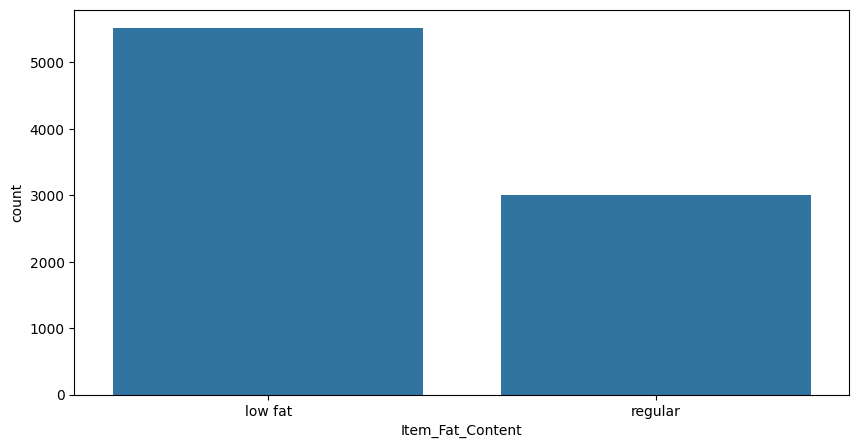

In [ ]:
#Plot countplot for Item_Fat_Content column
plt.figure(figsize=(10,5))
sns.countplot(x= "Item_Fat_Content" , data=data)
plt.show()

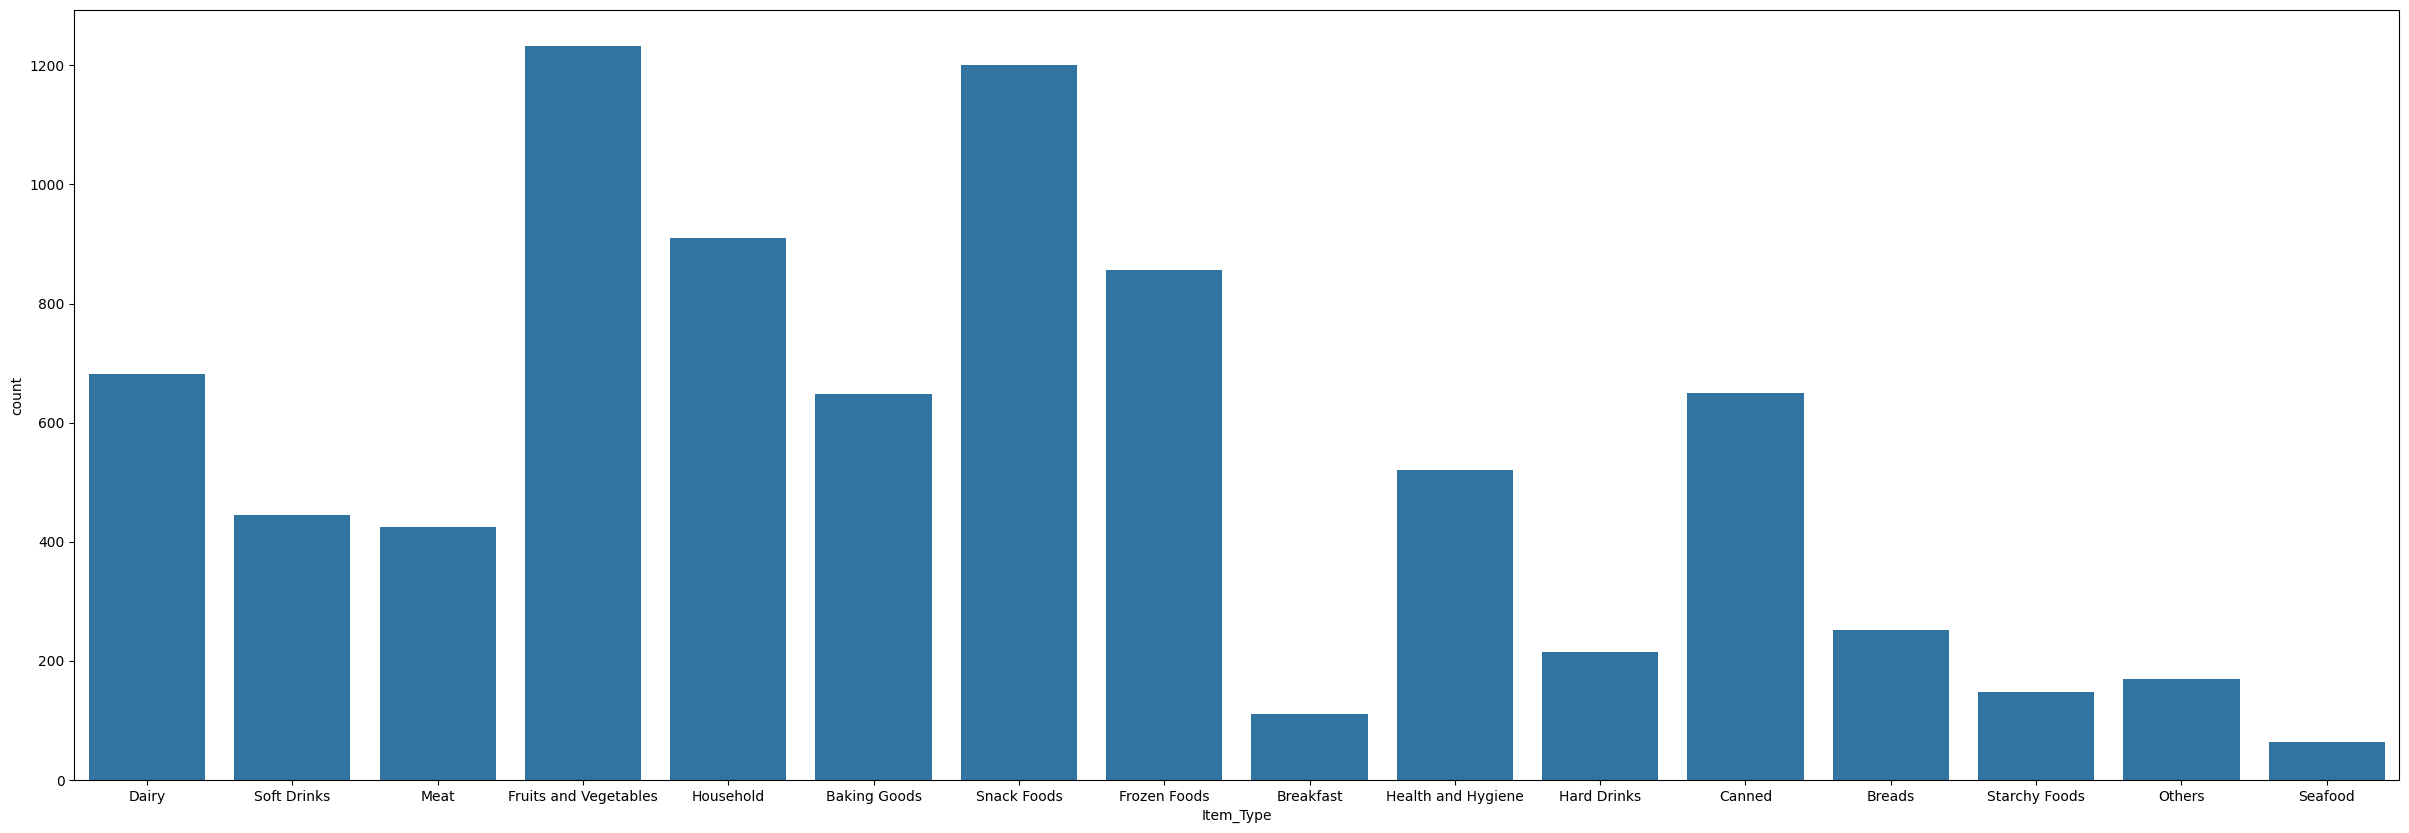

In [ ]:
#Plot countplot for Item_Type column
plt.figure(figsize=(30,10))
sns.countplot(x= "Item_Type" , data=data)
plt.show()

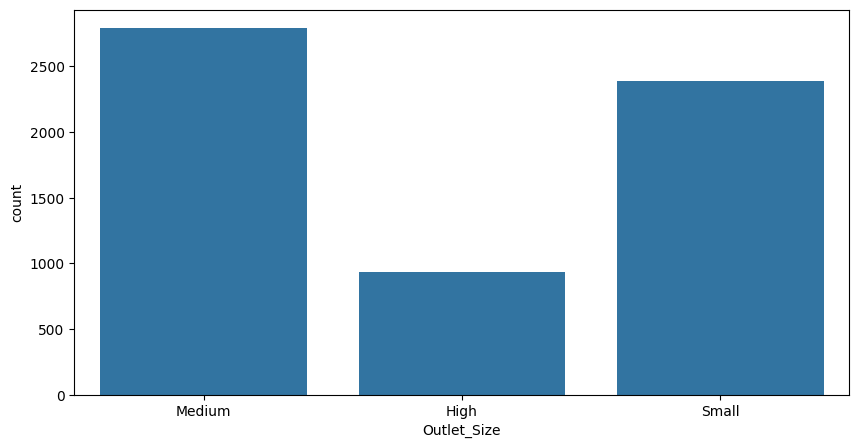

In [ ]:
#Plot countplot for Outlet_Size column
plt.figure(figsize=(10,5))
sns.countplot(x= "Outlet_Size" , data=data)
plt.show()

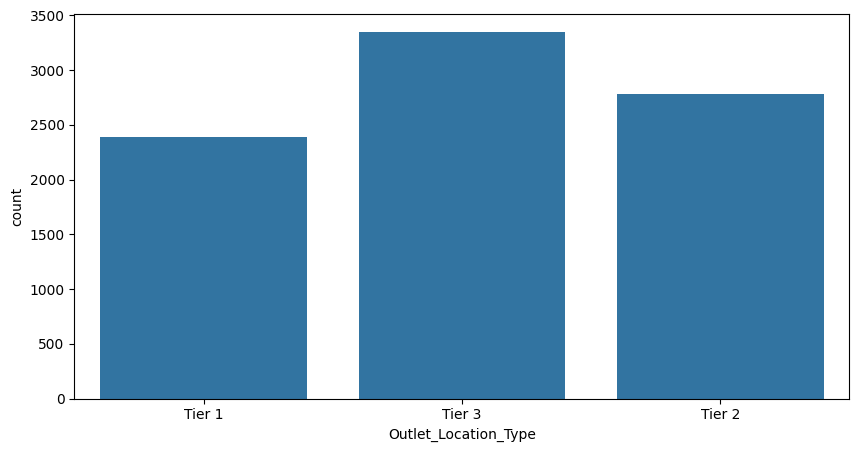

In [ ]:
#Plot countplot for Outlet_Location_Type column
plt.figure(figsize=(10,5))
sns.countplot(x= "Outlet_Location_Type" , data=data)
plt.show()

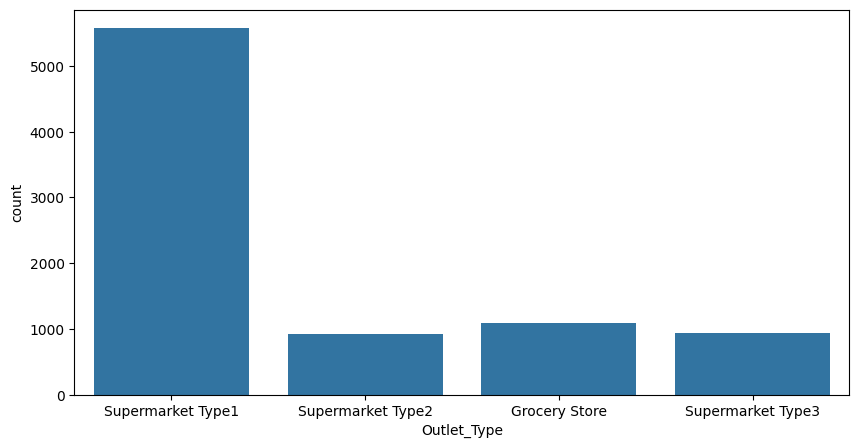

In [ ]:
#Plot countplot for Outlet_Type column
plt.figure(figsize=(10,5))
sns.countplot(x= "Outlet_Type" , data=data)
plt.show()

# Understanding Categorical Data

## Introduction  
Categorical data consists of **discrete variables** that represent categories rather than continuous numerical values. In the **BigMart Sales Dataset**, several key features are categorical and require proper analysis and transformation for effective use in modeling.

---

## **Categorical Variables in the Dataset**
The dataset contains the following categorical variables:

1. **Item_Fat_Content**  
   - Represents whether a product is **Low Fat or Regular Fat**.  
   - Some inconsistent labels exist (e.g., "LF" and "Low Fat" should be the same category).  
   - Needs **label standardization** before further analysis.

2. **Item_Type**  
   - Defines the **category of the product** (e.g., Dairy, Bakery, Meat, etc.).  
   - A high-cardinality feature (many unique values).
   - Possible grouping into **broader product categories** for better modeling.

3. **Outlet_Identifier**  
   - Unique store ID (categorical but not useful for modeling directly).
   - Can be mapped to **Outlet_Size, Outlet_Location_Type, and Outlet_Type** for better insights.

4. **Outlet_Establishment_Year**  
   - Initially numerical, but could be **transformed into categorical bins** like "Old", "Medium", and "New".
   - Alternatively, create a new feature: **"Years in Operation"** (2023 - Outlet_Establishment_Year).

5. **Outlet_Size**  
   - Represents store size as **Small, Medium, or Large**.
   - Missing values need **imputation based on Outlet_Type or Location_Type**.

6. **Outlet_Location_Type**  
   - Describes whether the store is located in a **Tier 1, Tier 2, or Tier 3 city**.
   - Could influence sales patterns and consumer behavior.

7. **Outlet_Type**  
   - Defines whether the outlet is a **Supermarket or Grocery Store**.
   - Could significantly impact sales, as supermarkets tend to have higher customer traffic.

---

## **Handling Categorical Data**
### **1. Label Standardization**
- Ensure consistency in text-based categories (e.g., merging "low fat", "LF", and "Low Fat" into one category).

### **2. Encoding Categorical Variables**
- **One-Hot Encoding (OHE):** Suitable for nominal variables like **Outlet_Type** and **Outlet_Location_Type**.
- **Label Encoding:** Suitable for ordinal variables like **Outlet_Size**.

### **3. Feature Engineering**
- **Binning Outlet_Age**: Convert **Outlet_Establishment_Year** into categorical groups like **Old, Medium, New**.
- **Item_Type Grouping**: Merge similar categories into broader groups (e.g., combining seafood and meat into "Protein-Based Products").

---


By cleaning and transforming categorical data effectively, we ensure **higher model accuracy and better data interpretation**.


# Encoding and Imputation

In [ ]:
# Initializing objects
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
imputer = KNN()

In [ ]:
# function to encode non-null data and replace it in the original data
def encode(data):
    # retains only non-null values
    nonulls = np.array(data.dropna())
    # reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1, 1)
    # encode date
    impute_ordinal = encoder.fit_transform(impute_reshape)
    # Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data

In [ ]:
def knn_impute(data):
    for i in categorical_columns:
        encode(data[i])
    knn_impute_data = pd.DataFrame(
        (imputer.fit_transform(data)), columns=data.columns
    )
    knn_impute_data["Outlet_Size"] = knn_impute_data["Outlet_Size"].round()
    return knn_impute_data

In [ ]:
# Performing imputation on training and testing data using KNN imputation
knn_impute_data = knn_impute(data)

Imputing row 1/8523 with 0 missing, elapsed time: 17.111
Imputing row 101/8523 with 1 missing, elapsed time: 17.119
Imputing row 201/8523 with 1 missing, elapsed time: 17.126
Imputing row 301/8523 with 1 missing, elapsed time: 17.132
Imputing row 401/8523 with 1 missing, elapsed time: 17.138
Imputing row 501/8523 with 1 missing, elapsed time: 17.145
Imputing row 601/8523 with 0 missing, elapsed time: 17.152
Imputing row 701/8523 with 1 missing, elapsed time: 17.157
Imputing row 801/8523 with 0 missing, elapsed time: 17.163
Imputing row 901/8523 with 1 missing, elapsed time: 17.169
Imputing row 1001/8523 with 1 missing, elapsed time: 17.176
Imputing row 1101/8523 with 1 missing, elapsed time: 17.182
Imputing row 1201/8523 with 0 missing, elapsed time: 17.188
Imputing row 1301/8523 with 0 missing, elapsed time: 17.197
Imputing row 1401/8523 with 1 missing, elapsed time: 17.202
Imputing row 1501/8523 with 0 missing, elapsed time: 17.209
Imputing row 1601/8523 with 1 missing, elapsed time:

In [ ]:
print(knn_impute_data.isnull().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


Text(0.5, 0, 'Item Weight')

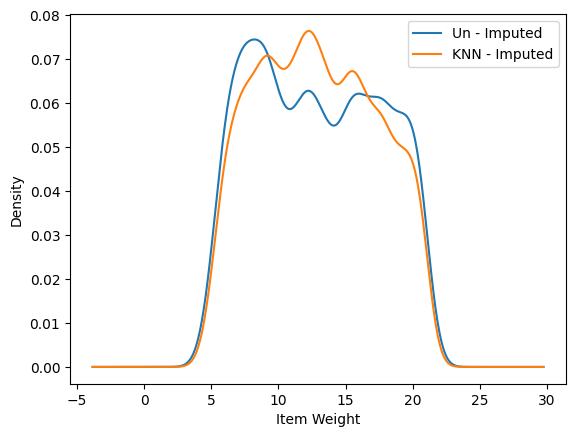

In [ ]:
data.Item_Weight.plot(kind="kde")
knn_impute_data.Item_Weight.plot(kind="kde")
plt.legend(["Un - Imputed", "KNN - Imputed"])
plt.xlabel("Item Weight")

Text(0.5, 0, 'Outlet Size')

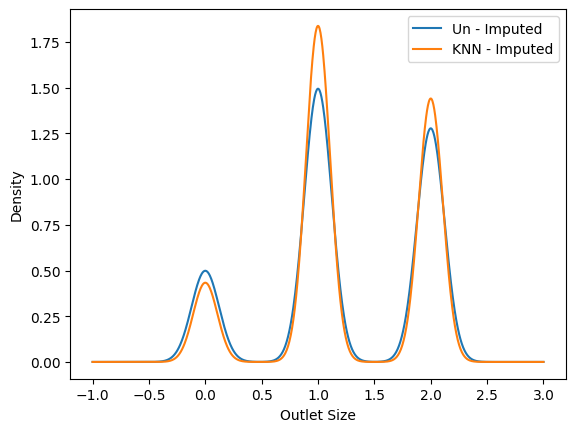

In [ ]:
data.Outlet_Size.plot(kind="kde")
knn_impute_data.Outlet_Size.plot(kind="kde")
plt.legend(["Un - Imputed", "KNN - Imputed"])
plt.xlabel("Outlet Size")

In [ ]:
# Function to impute data using mean & mode method
#Item_Weight is a continues variable.Mean
#Outlet_Size is a discrete variable.Mode
def m_impute(data):
    m_impute_data = data.copy()  # Make a copy of dataframe for imputation
    m_impute_data["Item_Weight"] = m_impute_data["Item_Weight"].fillna(
        m_impute_data["Item_Weight"].mean()
    )
    m_impute_data["Outlet_Size"] = m_impute_data["Outlet_Size"].fillna(
        m_impute_data["Outlet_Size"].mode()[0]
    )
    return m_impute_data


In [ ]:
# Performing imputation on data using Mean Mode method
m_impute_data = m_impute(data)  # Imputing Data

In [ ]:
print(m_impute_data.isnull().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


Text(0.5, 0, 'Item Weight')

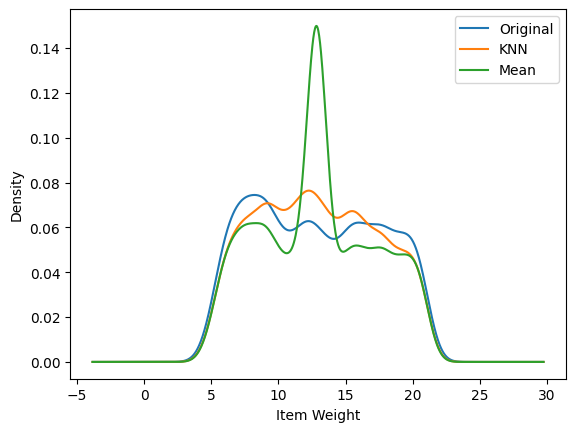

In [ ]:
# Statistical Difference in Item Weight after KNN Imputation and Mean Mode Imputation
data.Item_Weight.plot(kind="kde")
knn_impute_data.Item_Weight.plot(kind="kde")
m_impute_data.Item_Weight.plot(kind="kde")
plt.legend(["Original", "KNN", "Mean"])
plt.xlabel("Item Weight")

Text(0.5, 0, 'Outlet Size')

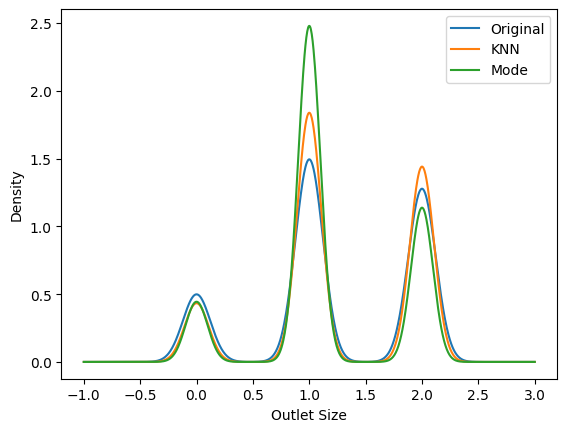

In [ ]:
# Statistical Difference in Outlet Size after KNN Imputationa and Mean Mode Imputation
data.Outlet_Size.plot(kind="kde")
knn_impute_data.Outlet_Size.plot(kind="kde")
m_impute_data.Outlet_Size.plot(kind="kde")
plt.legend(["Original", "KNN", "Mode"])
plt.xlabel("Outlet Size")

# Imputation Analysis: Comparing Different Methods

## **1. Item_Weight Imputation**
### **Observations:**
- The **original distribution (blue line)** is smooth with two primary peaks.
- **KNN Imputation (orange line)** closely follows the original distribution, maintaining its natural spread.
- **Mean Imputation (green line)** creates a sharp spike at the mean value, disrupting the smooth distribution.

### **Implications:**
 **KNN Imputation performs well** by preserving the natural variability of the data.  
 **Mean Imputation distorts the distribution**, leading to over-representation at the central value.  
 **Best Approach:** KNN is preferable for numerical data as it retains the original structure while estimating missing values.

---

## **2. Outlet_Size Imputation**
### **Observations:**
- The **original distribution (blue line)** has distinct peaks at specific categorical values.
- **KNN Imputation (orange line)** slightly shifts the peaks but maintains the structure.
- **Mode Imputation (green line)** strongly reinforces the most frequent category, creating **sharp peaks**.

### **Implications:**
 **Mode Imputation works well for categorical data**, as it preserves the most common category.  
 **KNN also performs well**, slightly smoothing the distribution but maintaining key peaks.  
 **Best Approach:**  
   - Mode imputation is suitable for categorical data like `Outlet_Size`.  
   - KNN can be used when additional context from similar data points is necessary.

# Encoding and Imputation Analysis

## **1. Handling Missing Values (Imputation)**  
### **Techniques Used:**  
- **K-Nearest Neighbors (KNN) Imputation**  
- **Iterative Imputer (MICE - Multiple Imputation by Chained Equations)**  
- **fillna() for simpler cases**

### **Key Observations:**
- **KNN Imputation** was used to fill missing values in numerical features by **finding the closest data points** and estimating the missing values.
- **MICE (Iterative Imputer)** was initialized but may have been used as an alternative approach to iteratively estimate missing values based on other features.
- **fillna() was likely used** for categorical variables, where missing values were replaced with the **mode** or the most frequent category.

### **Implications:**
 **KNN Imputation is effective for continuous data** but can be computationally expensive.  
 **MICE is useful for patterns in missing values** but requires careful feature selection.  
 **Categorical data imputation with mode ensures consistency** but may introduce bias.

---

## **2. Encoding Categorical Variables**  
### **Techniques Used:**  
- **Ordinal Encoding (for ordered categorical data)**
- **One-Hot Encoding (OHE for nominal categories)**

### **Key Observations:**
- **Ordinal Encoding** was applied using `OrdinalEncoder()` for categorical variables where **order matters**.
- **One-Hot Encoding (OHE)** was likely used for variables like `Outlet_Type`, `Outlet_Location_Type`, etc.
- A **custom function** was defined to encode non-null categorical data, ensuring that missing values are retained while transforming available values.

### **Implications:**
 **Ordinal Encoding is ideal for variables with an inherent order** (e.g., Small, Medium, Large for `Outlet_Size`).  
 **One-Hot Encoding is useful for categorical variables without a natural order** (e.g., `Outlet_Type`).  
 **The encoding function ensures that imputed values remain correctly formatted.**

---




In [ ]:
def encode_oneHot(data):
    data_one_hot = pd.get_dummies(
        data,
        columns=[
            "Item_Fat_Content",
            "Item_Type",
            "Outlet_Identifier",
            "Outlet_Size",
            "Outlet_Location_Type",
            "Outlet_Type",
        ],
    )
    return data_one_hot

# Conclusion

## **1. Summary of Key Findings**
- **Data Preprocessing & Cleaning:**  
  - Missing values were handled effectively using **KNN Imputation for numerical variables** and **Mode Imputation for categorical data**.  
  - **Feature Engineering** (e.g., converting `Outlet_Establishment_Year` to `Years in Operation`) improved data usability.
  
- **Exploratory Data Analysis (EDA):**  
  - **Item_Outlet_Sales showed a right-skewed distribution**, requiring possible transformation.  
  - **Item_MRP exhibited a strong correlation with sales**, indicating that pricing is a key driver.  
  - **Item_Visibility had outliers**, suggesting possible data entry issues.

- **Categorical Data Encoding:**  
  - **One-Hot Encoding** was applied to nominal categorical features (e.g., `Outlet_Type`).  
  - **Ordinal Encoding** was used for ordered categories (e.g., `Outlet_Size`).  

## **2. Reflection on the Effectiveness of the Approach**
 The preprocessing and imputation methods **successfully improved data quality**, making it suitable for modeling.  
The **pairplot and correlation heatmap** revealed valuable insights about relationships between variables.  
 Feature engineering steps (e.g., `Years in Operation`) **enhanced interpretability** for future analysis.  
 Encoding categorical data properly ensured that machine learning models can effectively process all features.  

## **3. Suggestions for Improvements & Future Work**
 **Feature Selection:** Further exploration of which features contribute most to sales predictions.  
 **Advanced Imputation Techniques:** Trying **multiple imputation methods (e.g., MICE, Bayesian imputation)** to compare results.  
 **Outlier Treatment:** More robust handling of extreme values in `Item_Visibility` and `Item_Outlet_Sales`.  
 **Predictive Modeling:** Applying machine learning algorithms (e.g., Linear Regression, Decision Trees) to predict sales performance.  

By implementing these improvements, we can further **enhance the dataset's predictive power and business insights**, leading to **better forecasting and strategic decision-making**.


# References

1. **Pandas Library Documentation** – Data manipulation and preprocessing  
   - URL: [https://pandas.pydata.org/docs/](https://pandas.pydata.org/docs/)

2. **Scikit-Learn Documentation** – Imputation and Encoding Techniques  
   - URL: [https://scikit-learn.org/stable/modules/preprocessing.html](https://scikit-learn.org/stable/modules/preprocessing.html)

3. **Seaborn Library Documentation** – Data Visualization  
   - URL: [https://seaborn.pydata.org/](https://seaborn.pydata.org/)

4. **KNN Imputation with `fancyimpute`**  
   - URL: [https://github.com/iskandr/fancyimpute](https://github.com/iskandr/fancyimpute)

5. **Exploratory Data Analysis (EDA) Techniques**  
   - M. Taddy, *Business Data Science: Combining Machine Learning and Economics to Optimize Decision Making*, McGraw Hill, 2019.

6. **Feature Engineering and Data Cleaning**  
   - Kuhn, M., & Johnson, K. (2013). *Applied Predictive Modeling*. Springer.

7. **Categorical Data Encoding Best Practices**  
   - Micci-Barreca, D. (2001). "A Preprocessing Scheme for High-Cardinality Categorical Attributes in Classification and Prediction Problems," *ACM SIGKDD Explorations Newsletter*.

8. **BigMart Sales Data Analysis - Kaggle Dataset**  

#License
MIT License

Copyright (c) 2025 Apoorv Dhaygude

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.